In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
%matplotlib inline

C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
start = datetime.datetime(2017,1,1)
end = datetime.datetime(2020,1,1)

In [3]:
# stock ticker list
tickers = 'GOOGL AAPL FB TWTR MSFT'.split()

In [4]:
# load data
GOOGL = data.DataReader('GOOGL', 'yahoo', start, end)

AAPL = data.DataReader('AAPL', 'yahoo', start, end)

FB = data.DataReader('FB', 'yahoo', start, end)

TWTR = data.DataReader('TWTR', 'yahoo', start, end)

MSFT = data.DataReader('MSFT', 'yahoo', start, end)

In [5]:
# concatenate the bank dataframes together to a single data frame
df = pd.concat([GOOGL, AAPL, FB, TWTR, MSFT], axis=1, keys=tickers)
df.columns.names = ['Stock Ticker', 'Stock Info']

In [6]:
df.head()

Stock Ticker       GOOGL                                               \
Stock Info          High         Low        Open       Close   Volume   
Date                                                                    
2017-01-03    811.440002  796.890015  800.619995  808.010010  1959000   
2017-01-04    813.429993  804.109985  809.890015  807.770020  1515300   
2017-01-05    813.739990  805.919983  807.500000  813.020020  1340500   
2017-01-06    828.960022  811.500000  814.989990  825.210022  2017100   
2017-01-09    830.429993  821.619995  826.369995  827.179993  1408900   

Stock Ticker                    AAPL                                      ...  \
Stock Info     Adj Close        High         Low        Open       Close  ...   
Date                                                                      ...   
2017-01-03    808.010010  116.330002  114.760002  115.800003  116.150002  ...   
2017-01-04    807.770020  116.510002  115.750000  115.849998  116.019997  ...   
2017-01-05    813.020020  116.860001  115.809998  115.919998  116.610001  ...   
2017-01-06    825.210022  118.160004  116.470001  116.779999  117.910004  ...   
2017-01-09    827.179993  119.430000  117.940002  117.949997  118.989998  ...   

Stock Ticker       TWTR                                       MSFT             \
Stock Info         Open      Close    Volume  Adj Close       High        Low   
Date                                                                            
2017-01-03    16.309999  16.440001  11147900  16.440001  62.840000  62.130001   
2017-01-04    16.500000  16.860001  15861300  16.860001  62.750000  62.119999   
2017-01-05    16.910000  17.090000  17074400  17.090000  62.660000  62.029999   
2017-01-06    17.240000  17.170000  14665100  17.170000  63.150002  62.040001   
2017-01-09    17.219999  17.500000  11918100  17.500000  63.080002  62.540001   

Stock Ticker                                               
Stock Info         Open      Close      Volume  Adj Close  
Date                                                       
2017-01-03    62.790001  62.580002  20694100.0  58.969059  
2017-01-04    62.480000  62.299999  21340000.0  58.705212  
2017-01-05    62.189999  62.299999  24876000.0  58.705212  
2017-01-06    62.299999  62.840000  19922900.0  59.214054  
2017-01-09    62.759998  62.639999  20382700.0  59.025597  

[5 rows x 30 columns]

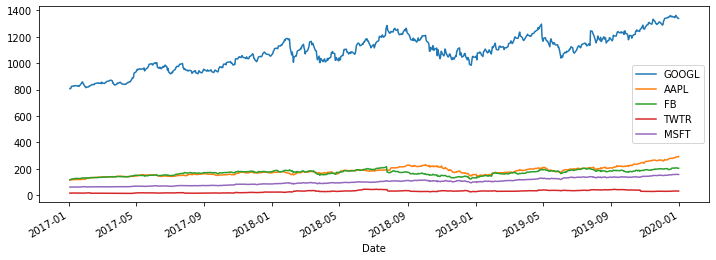

In [7]:
for ticker in tickers:
    df[ticker]['Close'].plot(figsize=(12,4),label=ticker)
plt.legend()

In [8]:
rolling_mean = pd.DataFrame()

In [9]:
for ticker in tickers:
    rolling_mean[ticker+' Rolling Mean'] = df[ticker]['Close'].rolling(window=30).mean()/df[ticker]['Close'][0]

Text(0.5, 1.0, 'Relative 30 Day Moving Average')

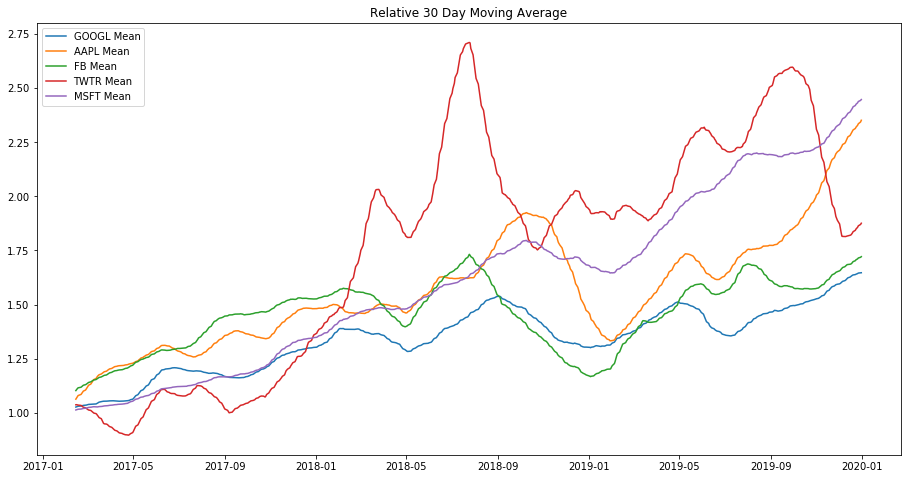

In [10]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_axes([0,0,1,1])

for ticker in tickers:
    ax.plot(rolling_mean[ticker+' Rolling Mean'], label=ticker+' Mean')

ax.legend()
ax.set_title('Relative 30 Day Moving Average')

In [11]:
for ticker in tickers:
    print(ticker, df[ticker]['Close'][[0,-1]])

GOOGL Date
2017-01-03     808.010010
2019-12-31    1339.390015
Name: Close, dtype: float64
AAPL Date
2017-01-03    116.150002
2019-12-31    293.649994
Name: Close, dtype: float64
FB Date
2017-01-03    116.860001
2019-12-31    205.250000
Name: Close, dtype: float64
TWTR Date
2017-01-03    16.440001
2019-12-31    32.049999
Name: Close, dtype: float64
MSFT Date
2017-01-03     62.580002
2019-12-31    157.699997
Name: Close, dtype: float64


Text(0.5, 1.0, 'GOOGLE close prices and rolling mean')

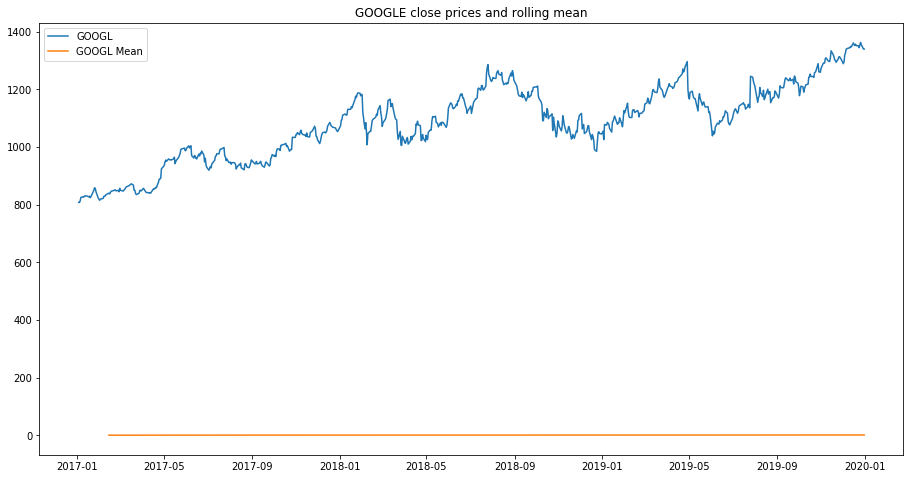

In [13]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_axes([0,0,1,1])

ax.plot(df['GOOGL']['Close'],label='GOOGL')
ax.plot(rolling_mean['GOOGL Rolling Mean'], label='GOOGL Mean')
ax.legend()
ax.set_title('GOOGLE close prices and rolling mean')

In [14]:
returns = pd.DataFrame()

In [15]:
for ticker in tickers:
    returns[ticker+' Return'] = df[ticker]['Close'].pct_change()
returns.head(10)

,GOOGL Return,AAPL Return,FB Return,TWTR Return,MSFT Return
Date,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN
2017-01-04,-0.000297,-0.001119,0.015660,0.025547,-0.004474
2017-01-05,0.006499,0.005085,0.016682,0.013642,0.000000
2017-01-06,0.014993,0.011148,0.022707,0.004681,0.008668
2017-01-09,0.002387,0.009159,0.012074,0.019220,-0.003183
2017-01-10,-0.001414,0.001009,-0.004404,-0.007429,-0.000319
2017-01-11,0.004661,0.005373,0.013993,-0.004030,0.009103
2017-01-12,-0.000398,-0.004175,0.004203,0.004624,-0.009179
2017-01-13,0.001700,-0.001761,0.013584,-0.007480,0.001437


In [16]:
returns.corr()

,GOOGL Return,AAPL Return,FB Return,TWTR Return,MSFT Return
GOOGL Return,1.000000,0.597612,0.617712,0.445135,0.725593
AAPL Return,0.597612,1.000000,0.467947,0.356582,0.624644
FB Return,0.617712,0.467947,1.000000,0.384697,0.539324
TWTR Return,0.445135,0.356582,0.384697,1.000000,0.393419
MSFT Return,0.725593,0.624644,0.539324,0.393419,1.000000


In [17]:
import matplotlib.pyplot as plt

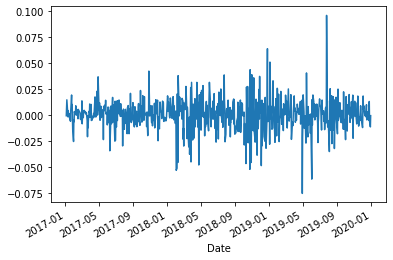

In [18]:
fig= plt.figure()
ax = returns['GOOGL Return'].plot()

In [19]:
import seaborn as sns
sns.set_style('whitegrid')

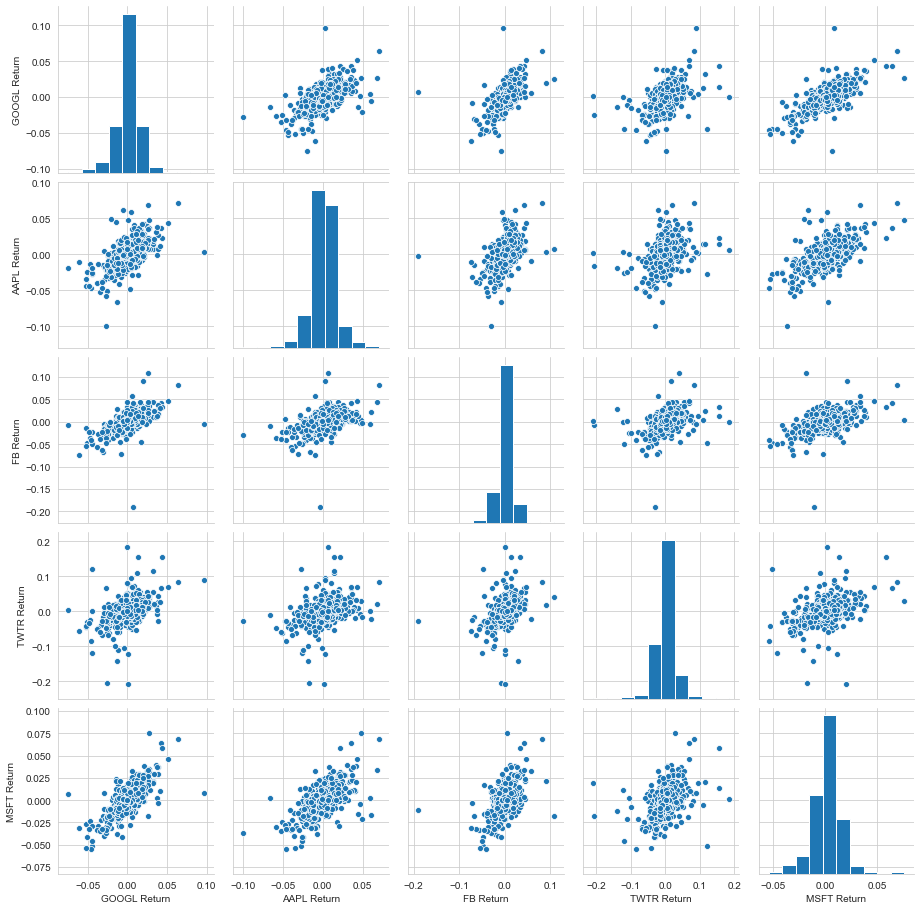

In [20]:
sns.pairplot(returns[1:])

In [21]:
returns.idxmin()

GOOGL Return   2019-04-30
AAPL Return    2019-01-03
FB Return      2018-07-26
TWTR Return    2019-10-24
MSFT Return    2018-10-10
dtype: datetime64[ns]

In [22]:
returns.min()

GOOGL Return   -0.075019
AAPL Return    -0.099607
FB Return      -0.189609
TWTR Return    -0.208087
MSFT Return    -0.054338
dtype: float64

In [23]:
returns.idxmax()

GOOGL Return   2019-07-26
AAPL Return    2018-12-26
FB Return      2019-01-31
TWTR Return    2017-10-26
MSFT Return    2018-03-26
dtype: datetime64[ns]

In [24]:
returns.max()

GOOGL Return    0.096202
AAPL Return     0.070422
FB Return       0.108164
TWTR Return     0.184948
MSFT Return     0.075705
dtype: float64

In [25]:
returns.std()

GOOGL Return    0.014488
AAPL Return     0.015565
FB Return       0.018262
TWTR Return     0.029987
MSFT Return     0.013675
dtype: float64

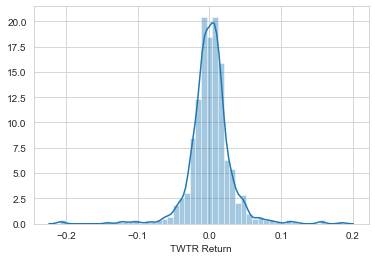

In [26]:
sns.distplot(returns['TWTR Return'], bins=50)

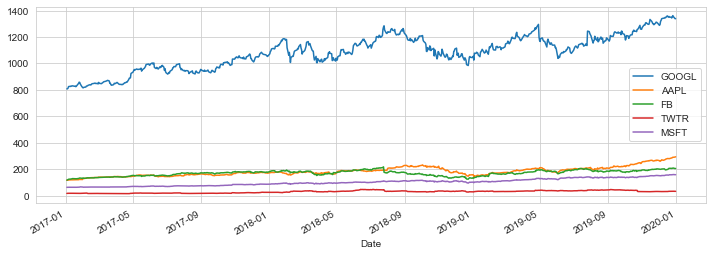

In [27]:
for ticker in tickers:
    df[ticker]['Close'].plot(figsize=(12,4),label=ticker)
plt.legend()

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import sklearn

In [29]:
dfreg = df['MSFT'][['Adj Close','Volume']]

In [30]:
dfreg['HL_PCT'] = (df['MSFT']['High']-df['MSFT']['Low'])/df['MSFT']['Close']*100

In [31]:
dfreg['Return'] = (df['MSFT']['Close'] - df['MSFT']['Open'])/df['MSFT']['Open']*100

In [32]:
dfreg.head()

Stock Info,Adj Close,Volume,HL_PCT,Return
Date,,,,
2017-01-03,58.969059,20694100.0,1.134546,-0.334447
2017-01-04,58.705212,21340000.0,1.011238,-0.288093
2017-01-05,58.705212,24876000.0,1.011238,0.176878
2017-01-06,59.214054,19922900.0,1.766392,0.866775
2017-01-09,59.025597,20382700.0,0.862070,-0.191203


In [33]:
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
forecast_out = int(np.ceil(0.01 * len(dfreg)))
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = sklearn.preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_test = X[-forecast_out:]
X_train = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y_test = y[-forecast_out:]
y_train = y[:-forecast_out]

In [34]:
print(X_test.shape, X_train.shape, y_test.shape, y_train.shape)

(8, 4) (746, 4) (8,) (746,)


In [35]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [36]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [37]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [40]:
forecast_set = clfreg.predict(X_test)
dfreg['Forecast'] = np.nan

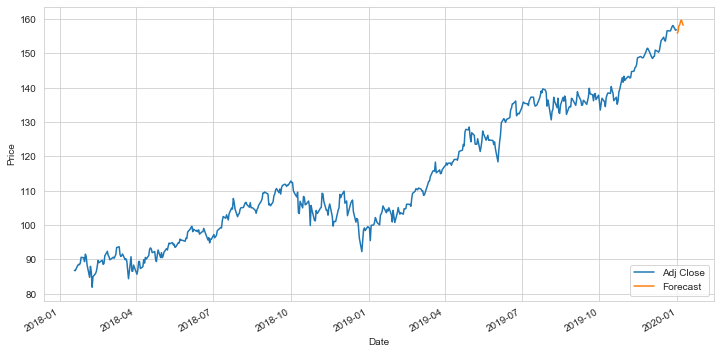

In [41]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot(figsize=(12,6))
dfreg['Forecast'].tail(500).plot(figsize=(12,6))
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [45]:
endmore = datetime.datetime(2020,2,1)
MSFT_future = data.DataReader('MSFT', 'yahoo', end, endmore)

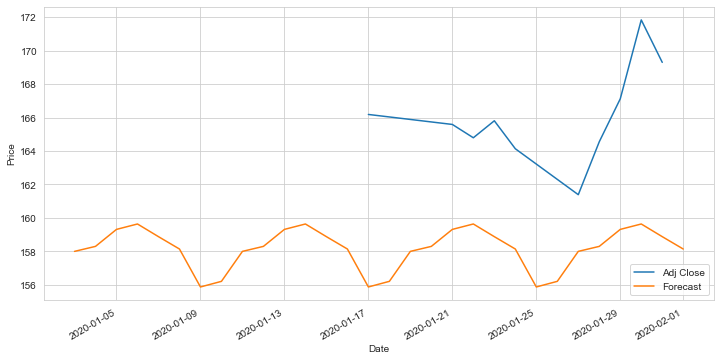

In [46]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
MSFT_future['Adj Close'].tail(10).plot(figsize=(12,6))
dfreg['Forecast'].tail(30).plot(figsize=(12,6))
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()